In [2]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import seaborn as sns

In [34]:
def get_result(run_id, unit_idx):
    api = wandb.Api()
    run = api.run(f"sinzlab/egg/{run_id}")
    history = run.history()

    dime = history.query(f"unit_idx == {unit_idx}")

    # download image
    filename = dime.image[0]["path"]
    file = run.file(filename)
    filename = file.download(exist_ok=True).name
    image = Image.open(filename)
    image = np.array(image)

    return image, dime.train[0]


def get_scores(run_id):
    api = wandb.Api()
    run = api.run(f"sinzlab/egg/{run_id}")
    history = run.history(samples=2000)

    return history


history = get_scores("m4uaksp7")

In [35]:
idx = history.groupby(["unit_idx", "energy_scale"])["val"].idxmin()
menis = history.loc[
    idx, ["seed", "energy_scale", "unit_idx", "train", "val", "cross-val", "image"]
]

max_vals = menis.query("energy_scale == 10").groupby("unit_idx")["val"].max()
menis["val"] = menis["val"] / menis["unit_idx"].map(max_vals)

In [36]:
api = wandb.Api()
run = api.run(f"sinzlab/egg/pga7ddwq")

np.random.seed(3)
units = np.random.choice(menis["unit_idx"].unique(), 2).tolist()

units = [227, 821, 1176, 1017, 963, 425, 83, 1111]

meni_imgs = []
for unit_idx in units:
    images = menis.query(f"unit_idx == {unit_idx}")
    imgs = []
    for image in images.iterrows():
        filename = image[1].image["path"]
        file = run.file(filename)
        filename = file.download(exist_ok=True).name
        _img = Image.open(filename)
        imgs.append(_img)

    meni_imgs += [np.hstack(imgs)]

meni_imgs = np.vstack(meni_imgs)

In [37]:
np.median(np.array(scores)), np.median(-menis.query("energy_scale == 1")["cross-val"])

(3.4820241928100586, 5.538923740386963)

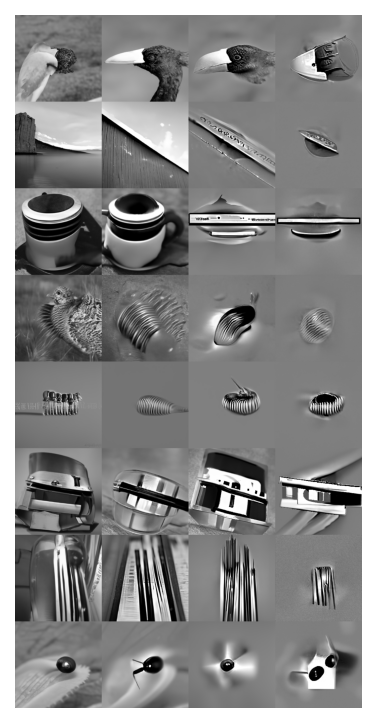

In [38]:
plt.figure(figsize=(20, 6), dpi=150)  # , facecolor=palettes['candy']['blue'])
plt.imshow(meni_imgs)
plt.axis(False)
# plt.savefig("./menis.png", dpi=150, bbox_inches="tight", pad_inches=0)
plt.show()

In [15]:
np.random.seed(5)
units = np.random.choice(menis["unit_idx"].unique(), 3).tolist()

units = [1025, 1093, 809, 286, 805] + units

meni_imgs = []
for unit_idx in units:
    images = menis.query(f"unit_idx == {unit_idx}")
    imgs = []
    for image in images.iterrows():
        filename = image[1].image["path"]
        file = run.file(filename)
        filename = file.download(exist_ok=True).name
        _img = Image.open(filename)
        imgs.append(_img)

    meni_imgs += [np.hstack(imgs)]

meni_imgs = np.vstack(meni_imgs)

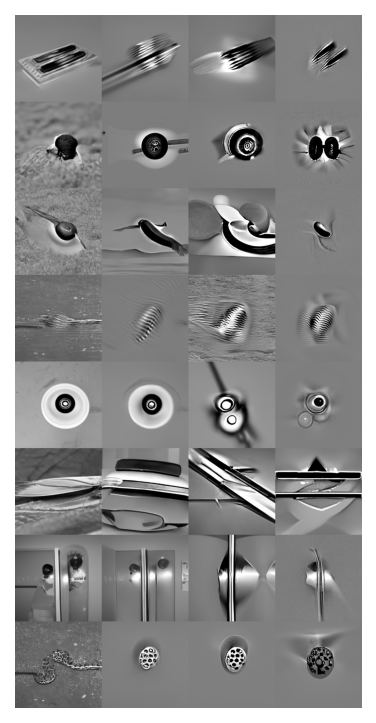

In [16]:
plt.figure(figsize=(20, 6), dpi=150)  # , facecolor=palettes['candy']['blue'])
plt.imshow(meni_imgs)
plt.axis(False)
# plt.savefig("./menis_2.png", dpi=150, bbox_inches="tight", pad_inches=0)
plt.show()

In [17]:
api = wandb.Api()
run = api.run(f"sinzlab/egg/pga7ddwq")

np.random.seed(40)
units = np.random.choice(menis["unit_idx"].unique(), 8).tolist()

meni_imgs = []
for unit_idx in units:
    images = menis.query(f"unit_idx == {unit_idx}")
    print(len(images))
    imgs = []
    for image in images.iterrows():
        filename = image[1].image["path"]
        file = run.file(filename)
        filename = file.download(exist_ok=True).name
        _img = Image.open(filename)
        imgs.append(_img)

    meni_imgs += [np.hstack(imgs)]

meni_imgs = np.vstack(meni_imgs)

4
4
4
4
4
4
4
4


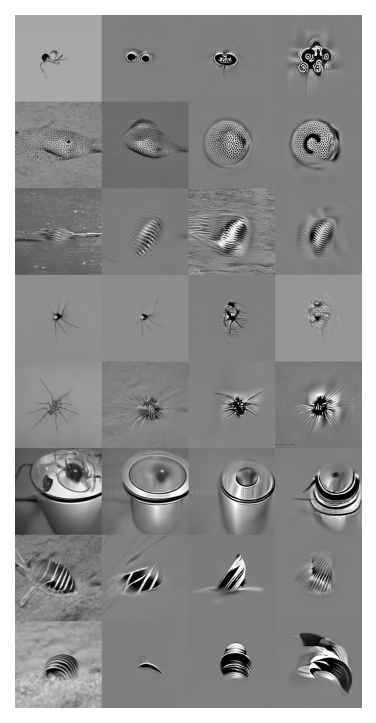

In [18]:
plt.figure(figsize=(20, 6), dpi=150)  # , facecolor=palettes['candy']['blue'])
plt.imshow(meni_imgs)
plt.axis(False)
# plt.savefig("./menis_3.png", dpi=150, bbox_inches="tight", pad_inches=0)
plt.show()

In [19]:
history = get_scores("st6ym3wn")

idx = history.groupby(["unit_idx", "energy_scale"])["val"].idxmin()
menis = history.loc[
    idx, ["seed", "energy_scale", "unit_idx", "train", "val", "cross-val", "image"]
]

max_vals = menis.query("energy_scale == 10").groupby("unit_idx")["val"].max()
menis["val"] = menis["val"] / menis["unit_idx"].map(max_vals)

In [20]:
api = wandb.Api()
run = api.run(f"sinzlab/egg/st6ym3wn")
np.random.seed(20)
units = np.random.choice(menis["unit_idx"].unique(), 8).tolist()

meni_imgs = []
for unit_idx in units:
    images = menis.query(f"unit_idx == {unit_idx}")
    print(len(images))
    if len(images) != 4:
        continue
    imgs = []
    for image in images.iterrows():
        filename = image[1].image["path"]
        file = run.file(filename)
        filename = file.download(exist_ok=True).name
        _img = Image.open(filename)
        imgs.append(_img)

    meni_imgs += [np.hstack(imgs)]

meni_imgs = np.vstack(meni_imgs)

4
4
4
4
4
4
4
4


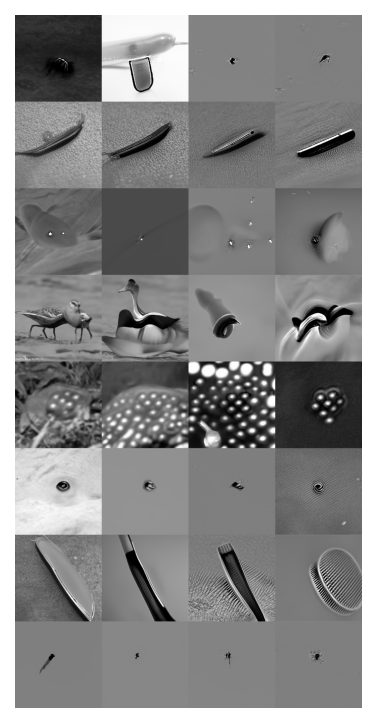

In [21]:
plt.figure(figsize=(20, 6), dpi=150)  # , facecolor=palettes['candy']['blue'])
plt.imshow(meni_imgs)
plt.axis(False)
# plt.savefig("./menis_attn_sup_2.png", dpi=150, bbox_inches="tight", pad_inches=0)
plt.show()

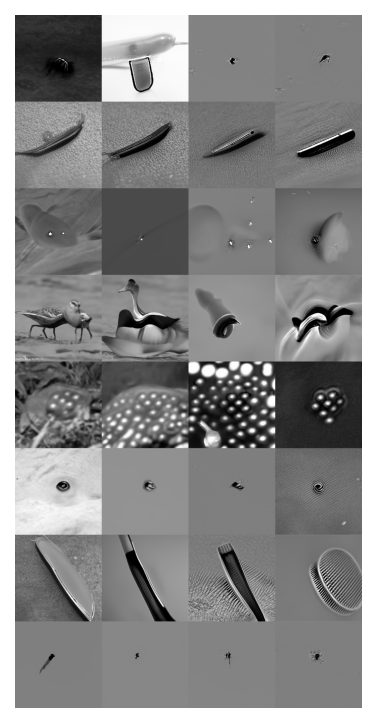

In [22]:
plt.figure(figsize=(20, 6), dpi=150)  # , facecolor=palettes['candy']['blue'])
plt.imshow(meni_imgs)
plt.axis(False)
# plt.savefig("./menis_attn.png", dpi=150, bbox_inches="tight", pad_inches=0)
plt.show()

In [58]:
mei_history = get_scores("h83eq1s8")
idx = mei_history.groupby(["unit_idx"])["train"].idxmin()
meis = mei_history.loc[idx, ["seed", "unit_idx", "train", "val", "cross-val", "image"]]

td_baseline = meis['val'].mean()

mei_history = get_scores("jk3fgqnn")
idx = mei_history.groupby(["unit_idx"])["train"].idxmin()
meis = mei_history.loc[idx, ["seed", "unit_idx", "train", "val", "cross-val", "image"]]

dd_baseline = meis['val'].mean()

td_baseline, dd_baseline

9.194047339158978
6.035288050445357


(13.00302793910106, 7.593437830607097)

In [56]:
td_history = get_scores("m4uaksp7")
idx = td_history.groupby(['unit_idx', 'energy_scale'])['train'].idxmin()
menis = td_history.loc[idx, ['seed', 'energy_scale', 'unit_idx', 'train', 'val', 'cross-val', 'image']]
menis['val'] = -menis['val']

# max_vals = menis.groupby('unit_idx')['val'].max()
# menis['val'] = menis['val'] / menis['unit_idx'].map(max_vals)
print(menis['val'].mean())
menis['val'] = menis['val'] / td_baseline


# menis['cross-val'] = -menis['cross-val']
# max_vals = menis.groupby('unit_idx')['cross-val'].max()

mu = menis.groupby('energy_scale').mean()['val']
se = menis.groupby('energy_scale').std()['val'] / np.sqrt(150)

15.159507722655933


/var/folders/l0/5z9p4hy52cb1qp1y62gb48sw0000gn/T/ipykernel_32983/99168571.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mu = menis.groupby('energy_scale').mean()['val']
/var/folders/l0/5z9p4hy52cb1qp1y62gb48sw0000gn/T/ipykernel_32983/99168571.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  se = menis.groupby('energy_scale').std()['val'] / np.sqrt(150)


In [57]:
dd_history = get_scores("st6ym3wn")
idx = dd_history.groupby(['unit_idx', 'energy_scale'])['train'].idxmin()
menis = dd_history.loc[idx, ['seed', 'energy_scale', 'unit_idx', 'train', 'val', 'cross-val', 'image']]
menis['val'] = -menis['val']

# max_vals = menis.groupby('unit_idx')['val'].max()
# menis['val'] = menis['val'] / menis['unit_idx'].map(max_vals)
print(menis['val'].mean())
menis['val'] = menis['val'] / dd_baseline


# menis['cross-val'] = -menis['cross-val']
# max_vals = menis.groupby('unit_idx')['cross-val'].max()

mu_att = menis.groupby('energy_scale').mean()['val']
se_at = menis.groupby('energy_scale').std()['val'] / np.sqrt(150)

11.968740045693185


/var/folders/l0/5z9p4hy52cb1qp1y62gb48sw0000gn/T/ipykernel_32983/161300359.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mu_att = menis.groupby('energy_scale').mean()['val']
/var/folders/l0/5z9p4hy52cb1qp1y62gb48sw0000gn/T/ipykernel_32983/161300359.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  se_at = menis.groupby('energy_scale').std()['val'] / np.sqrt(150)


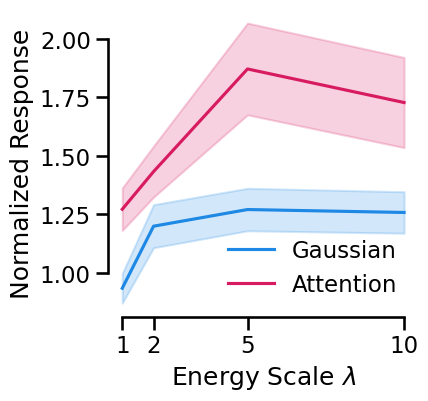

In [59]:
from egg.palettes import palettes

# idx = history.groupby(["unit_idx", "energy_scale"])["train"].idxmin()
# menis = history.loc[
#     idx, ["seed", "energy_scale", "unit_idx", "train", "val", "cross-val", "image"]
# ]
# menis["val"] = -menis["val"]
#
# max_vals = menis.groupby("unit_idx")["val"].max()
# menis["val"] = menis["val"] / menis["unit_idx"].map(max_vals)
#
# menis["cross-val"] = -menis["cross-val"]
# max_vals = menis.groupby("unit_idx")["cross-val"].max()
#
# mu_att = history.groupby("energy_scale").mean()["val"]
# se_at = history.groupby("energy_scale").std()["val"] / np.sqrt(150)
plt.style.use('default')
sns.set_context("talk")
plt.figure(figsize=(4, 4))
plt.plot(mu.index, mu.to_numpy(), c=palettes["candy"]["blue"], label="Gaussian")
plt.fill_between(
    mu.index,
    mu.to_numpy() + se.to_numpy(),
    mu.to_numpy() - se.to_numpy(),
    color=palettes["candy"]["blue"],
    alpha=0.2,
)

plt.plot(
    mu_att.index, mu_att.to_numpy(), c=palettes["candy"]["pink"], label="Attention"
)
plt.fill_between(
    mu_att.index,
    mu_att.to_numpy() + se_at.to_numpy(),
    mu_att.to_numpy() - se_at.to_numpy(),
    color=palettes["candy"]["pink"],
    alpha=0.2,
)

# plt.xlim(1, 10)
# plt.ylim(0.5, 1.5)

# plt.yticks([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2.0, 2.25], ["0.50", "0.75", "1.00", "1.25", "1.50", 1.75, "2.00", 2.25])
plt.xticks([1, 2, 5, 10])

plt.xlabel("Energy Scale $\lambda$")
plt.ylabel("Normalized Response")

sns.despine(trim=True)
plt.legend(frameon=False)
# plt.savefig("./menis_activations.png", dpi=150, bbox_inches="tight")
plt.show()

[796, 731, 82]
4
4
4


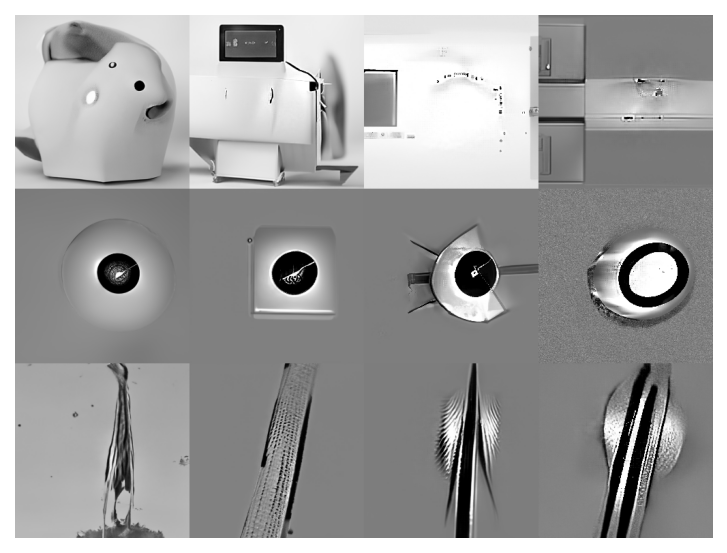

In [197]:
api = wandb.Api()
run = api.run(f"sinzlab/egg/pga7ddwq")

np.random.seed(42)
units = np.random.choice(menis["unit_idx"].unique(), 3).tolist()

units = units

meni_imgs = []
for unit_idx in units:
    images = menis.query(f"unit_idx == {unit_idx}")
    imgs = []
    for image in images.iterrows():
        filename = image[1].image["path"]
        file = run.file(filename)
        filename = file.download(exist_ok=True).name
        _img = Image.open(filename)
        imgs.append(_img)

    meni_imgs += [np.hstack(imgs)]

meni_imgs = np.vstack(meni_imgs)

plt.figure(figsize=(6, 6), dpi=150)
plt.imshow(meni_imgs)
plt.axis(False)
plt.savefig("./menis_examples.png", dpi=150, bbox_inches="tight", pad_inches=0)
plt.show()

[286]
(768, 1024, 3)


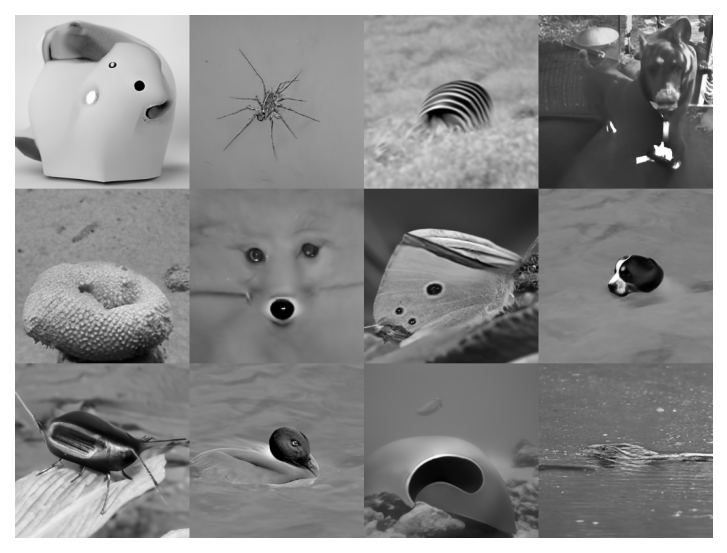

In [261]:
api = wandb.Api()
run = api.run(f"sinzlab/egg/m4uaksp7")

np.random.seed(5)
units = np.random.choice(history["unit_idx"].unique(), 1).tolist()
print(units)

units = [796, 438, 490, 946, 747, 201, 1179, 1119, 161, 432, 200, 286]

meni_imgs = []
for unit_idx in units:
    images = menis.query(f"unit_idx == {unit_idx}").query("energy_scale == 1")
    imgs = []
    for image in images.iterrows():
        filename = image[1].image["path"]
        file = run.file(filename)
        filename = file.download(exist_ok=True).name
        _img = Image.open(filename)
        imgs.append(_img)

    meni_imgs += [np.hstack(imgs)]

meni_imgs = np.array(meni_imgs)
meni_imgs = meni_imgs.reshape(3, 4, 256, 256, 3)
meni_imgs = np.hstack(meni_imgs)
meni_imgs = np.hstack(meni_imgs)

plt.figure(figsize=(6, 6), dpi=150)  # , facecolor=palettes['candy']['blue'])
plt.imshow(meni_imgs)
plt.axis(False)
plt.savefig("./menis_examples.png", dpi=150, bbox_inches="tight", pad_inches=0)
plt.show()

In [8]:
import torch
import deeplake
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

/Users/paul/PycharmProjects/guided-diffusion/venv/lib/python3.9/site-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (3.6.17) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


In [9]:
ds = deeplake.load(("hub://sinzlab/imagenet_and_responses_5M"))

/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/sinzlab/imagenet_and_responses_5M



-

hub://sinzlab/imagenet_and_responses_5M loaded successfully.



In [10]:
n_images = 100_000
resps = []
for i, sample in tqdm(enumerate(ds)):
    if i == 100_000:
        break
    resps.append(sample.responses.numpy())

100000it [00:58, 1708.34it/s]


In [11]:
resps = np.stack(resps)

In [7]:
from lib.nnvision.nnvision.models.trained_models.v4_data_driven import (
    v4_multihead_attention_ensemble_model,
)

v4_multihead_attention_ensemble_model.eval()

tform = transforms.Compose(
    [
        transforms.ToTensor(),  # Must convert to pytorch tensor for subsequent operations to run
        transforms.Normalize(
            [0.4876],
            [
                0.2756,
            ],
        ),  # images are grayscale, mean and std are taken from our actual monkey data
    ]
)

neuron_idx = np.load("./pretrained_resnet_unit_correlations.npy").argsort()[::-1][:150]
n_top_images = 1

img_indices = np.concatenate(
    [np.argsort(resps[:, i])[-n_top_images:] for i in neuron_idx]
)

responses = [torch.Tensor(ds.responses[int(i)].numpy()) for i in img_indices]
responses = [r[i] for r, i in zip(responses, neuron_idx)]

images = torch.stack([tform(ds.images[int(i)].numpy()) for i in img_indices])

scores = []
for i, n in zip(images, neuron_idx):
    score = v4_multihead_attention_ensemble_model(
        i.unsqueeze(0), data_key="all_sessions"
    )[:, n].item()

    scores.append(score)

[2023-05-11 22:41:19,353][INFO]: Connecting @localhost:3306


datajoint connection not established, skipping model imports from nnfabrik tables


[2023-05-11 22:41:20,835][INFO]: Connecting @localhost:3306


datajoint connection not established, skipping model imports from nnfabrik tables


In [22]:
norms = torch.norm(images, dim=(2, 3)).squeeze().numpy()
np.save("./natural_norms.npy", np.stack([norms, neuron_idx]))

norm = np.stack([norms, neuron_idx])
print(norm[0, norm[1] == neuron_idx[0]])

[148.81259155]


In [16]:
import seaborn as sns


def plot(x, y, ax=None, c="#1E88E5"):
    if ax is None:
        ax = plt.gca()

    coeff = (x @ y + 1) / (x @ x + 1)
    ax.plot([0, 60], [0, 60], c="tab:gray", ls="--", lw=2)
    ax.plot([0, 60], [0, 60 * coeff], c="k", ls="-", lw=2)
    ax.scatter(x, y, c=c, zorder=10)  # , edgecolor='k', linewidth=2, zorder=10)
    ax.axis("equal")
    ax.text(15, 35, f"$y(x) = {coeff:.2f}x$")

    sns.despine(trim=True)

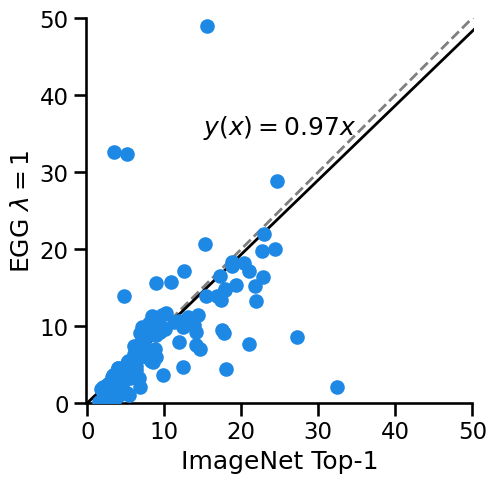

In [259]:
sns.set_context("talk")
plt.figure(figsize=(5, 5))
plot(
    np.array(scores)[np.array(neuron_idx).argsort()],
    menis.query("energy_scale == 1")["cross-val"],
    c=palettes["candy"]["blue"],
)
plt.xlim(0, 50)
plt.ylim(0, 50)

plt.xticks([0, 10, 20, 30, 40, 50])
plt.yticks([0, 10, 20, 30, 40, 50])

plt.xlabel("ImageNet Top-1")
plt.ylabel("EGG $\lambda = 1$")

sns.despine(trim=True)
plt.savefig("./egg_vs_imagenet.png", dpi=150, bbox_inches="tight")

In [178]:
np.mean(np.array(scores)), np.mean(-menis.query("energy_scale == 1")["cross-val"])

(8.846704823970795, -9.286347575436036)

In [400]:
import scipy.stats as st

In [401]:
st.ttest_1samp(
    -menis.query("energy_scale == 1")["cross-val"]
    / np.array(scores)[np.array(neuron_idx).argsort()],
    popmean=1,
)

TtestResult(statistic=0.6287283983334655, pvalue=0.5304895397285881, df=149)

In [6]:
dd_history = get_scores("st6ym3wn")
idx = dd_history.groupby(['unit_idx', 'energy_scale'])['train'].idxmin()
menis = dd_history.loc[idx, ['seed', 'energy_scale', 'unit_idx', 'train', 'val', 'cross-val', 'image']]

print(menis)

      seed  energy_scale  unit_idx      train        val  cross-val  \
1036     1             1         4  -1.371569  -1.367547  -0.528583   
1037     1             2         4  -1.379191  -1.334825  -0.522702   
1038     1             5         4  -3.147625  -2.336101  -0.520849   
1039     1            10         4  -3.618386  -3.042122  -0.460102   
784      1             1        24  -2.957414  -2.317778  -2.243904   
...    ...           ...       ...        ...        ...        ...   
1107     0            10      1221 -43.721821 -21.667616 -13.103162   
668      2             1      1234  -5.869273  -4.394293  -3.357209   
669      2             2      1234  -8.485740  -6.327256  -3.283422   
666      1             5      1234 -13.249002  -7.848436  -2.031387   
671      2            10      1234 -15.497258  -7.419618  -2.135367   

                                                  image  
1036  {'format': 'png', 'path': 'media/images/image_...  
1037  {'_type': 'image-file', '

In [25]:
from lib.nnvision.nnvision.models.trained_models.v4_task_driven import (
    task_driven_ensemble_1,
)

task_driven_ensemble_1.eval()

tform = transforms.Compose(
    [
        transforms.ToTensor(),  # Must convert to pytorch tensor for subsequent operations to run
        transforms.Normalize(
            [0.4876],
            [
                0.2756,
            ],
        ),  # images are grayscale, mean and std are taken from our actual monkey data
    ]
)

neuron_idx = menis['unit_idx'].unique() #np.load("../data/pretrained_resnet_unit_correlations.npy").argsort()[::-1][:150]
n_top_images = 1

img_indices = np.concatenate(
    [np.argsort(resps[:, i])[-n_top_images:] for i in neuron_idx]
)

responses = [torch.Tensor(ds.responses[int(i)].numpy()) for i in img_indices]
responses = [r[i] for r, i in zip(responses, neuron_idx)]

images = torch.stack([tform(ds.images[int(i)].numpy()) for i in img_indices])

scores = []
for i, n in zip(images, neuron_idx):
    score = task_driven_ensemble_1(
        i.unsqueeze(0), data_key="all_sessions"
    )[:, n].item()

    scores.append(score)

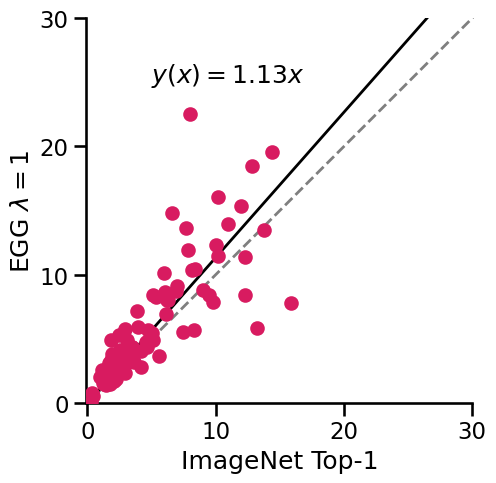

In [32]:
def plot(x, y, ax=None, c="#1E88E5"):
    if ax is None:
        ax = plt.gca()

    coeff = (x @ y + 1) / (x @ x + 1)
    ax.plot([0, 60], [0, 60], c="tab:gray", ls="--", lw=2)
    ax.plot([0, 60], [0, 60 * coeff], c="k", ls="-", lw=2)
    ax.scatter(x, y, c=c, zorder=10)  # , edgecolor='k', linewidth=2, zorder=10)
    ax.axis("equal")
    ax.text(5, 25, f"$y(x) = {coeff:.2f}x$")

    sns.despine(trim=True)

from egg.palettes import palettes
sns.set_context("talk")
plt.figure(figsize=(5, 5))
plot(
    np.array(scores)[np.array(neuron_idx).argsort()],
    -menis.query("energy_scale == 1")["cross-val"],
    c=palettes["candy"]["pink"],
)
plt.xlim(0, 30)
plt.ylim(0, 30)

plt.xticks([0, 10, 20, 30])#, 40, 50])
plt.yticks([0, 10, 20, 30])#, 40, 50])

plt.xlabel("ImageNet Top-1")
plt.ylabel("EGG $\lambda = 1$")

sns.despine(trim=True)
plt.savefig("./dd_egg_vs_imagenet.png", dpi=150, bbox_inches="tight")

In [22]:
print(neuron_idx)

[ 821  325   37   22   40  205   83 1074 1184  220  157   23  217   49
  964  240 1088  241   93   84 1213  780   94    8  778  156  509 1153
    9  185 1124 1234  933 1232  150 1017  946 1179 1176  332  425  106
 1093  411  900  881  287 1025  501  589  356   90 1111  237  127  310
  633  600 1046    5  426  202  572   39  331  883 1173  637  771  517
  371 1221 1119   11  320 1192 1217  546  659  201  438  716  437  276
  819  753  831  166  762  809  265  177 1150  943  289  507 1024  747
 1032  286  164  775  790  175 1068  688  161  963  732  796 1140   82
  488  324  227  391  153  910  556 1177  178  367  200  222  848   48
  590 1096  313  449  490  432   20   45  115  805  219  899 1118  403
  354 1034  982 1120  136  731  234  707   24  500]


In [24]:
menis['unit_idx'].unique()

array([   4,   24,   39,   40,   88,  106,  124,  127,  128,  135,  136,
        137,  151,  177,  198,  210,  211,  215,  227,  230,  236,  237,
        276,  301,  310,  344,  350,  375,  376,  388,  396,  406,  437,
        438,  442,  443,  444,  490,  500,  521,  527,  586,  605,  615,
        647,  669,  683,  688,  693,  710,  716,  726,  775,  795,  802,
        803,  809,  814,  822,  845,  852,  883,  890,  896,  897,  901,
        927,  934,  943,  963,  992,  997, 1000, 1024, 1045, 1065, 1087,
       1094, 1118, 1137, 1145, 1171, 1178, 1179, 1187, 1193, 1217, 1219,
       1221, 1234])